In [1]:
# imports
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
# local
import acquire as a
import t_prepare as p

In [2]:
df_m = a.get_wine()

In [3]:
df_m.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red  
0      9.4        5    1  
1      9.8        5    1  
2      9.8        5    1  
3      9.8        6    1  
4      9.4        5    1

In [4]:
df_m.shape

(6497, 13)

In [5]:
# fixed_acidity between 4.8 mg/L and 14.2mg/L
# volatile_acidity g/mL, lower better
# chlorides mg/L
# residual_sugar 1g/L 45 g/L, sweet if over 35 g/L         

In [6]:
df_m.describe().T

count        mean        std      min       25%  \
fixed acidity         6497.0    7.215307   1.296434  3.80000   6.40000   
volatile acidity      6497.0    0.339666   0.164636  0.08000   0.23000   
citric acid           6497.0    0.318633   0.145318  0.00000   0.25000   
residual sugar        6497.0    5.443235   4.757804  0.60000   1.80000   
chlorides             6497.0    0.056034   0.035034  0.00900   0.03800   
free sulfur dioxide   6497.0   30.525319  17.749400  1.00000  17.00000   
total sulfur dioxide  6497.0  115.744574  56.521855  6.00000  77.00000   
density               6497.0    0.994697   0.002999  0.98711   0.99234   
pH                    6497.0    3.218501   0.160787  2.72000   3.11000   
sulphates             6497.0    0.531268   0.148806  0.22000   0.43000   
alcohol               6497.0   10.491801   1.192712  8.00000   9.50000   
quality               6497.0    5.818378   0.873255  3.00000   5.00000   
red                   6497.0    0.246114   0.430779  0.00000   0.00000   

                            50%        75%        max  
fixed acidity           7.00000    7.70000   15.90000  
volatile acidity        0.29000    0.40000    1.58000  
citric acid             0.31000    0.39000    1.66000  
residual sugar          3.00000    8.10000   65.80000  
chlorides               0.04700    0.06500    0.61100  
free sulfur dioxide    29.00000   41.00000  289.00000  
total sulfur dioxide  118.00000  156.00000  440.00000  
density                 0.99489    0.99699    1.03898  
pH                      3.21000    3.32000    4.01000  
sulphates               0.51000    0.60000    2.00000  
alcohol                10.30000   11.30000   14.90000  
quality                 6.00000    6.00000    9.00000  
red                     0.00000    0.00000    1.00000

In [7]:
# Find the distribution/percentage of red wines and quality
# find the distribution/percentage of white quality

In [8]:
df_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red                   6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


#### ARE THERE ANY OBVIOUS TRENDS

In [9]:
#Train split
train, validate, test = p.split_data(df_m)
train.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5130            6.4              0.28         0.44             7.1      0.048   
3064            7.0              0.20         0.74             0.8      0.044   
4040            7.2              0.20         0.28             1.6      0.028   
363            12.5              0.46         0.63             2.0      0.071   
2950            6.5              0.37         0.33             3.9      0.027   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5130                 49.0                 179.0  0.99528  3.15       0.48   
3064                 19.0                 163.0  0.99310  3.46       0.53   
4040                 13.0                 168.0  0.99203  3.17       1.06   
363                   6.0                  15.0  0.99880  2.99       0.87   
2950                 40.0                 130.0  0.99060  3.28       0.39   

      alcohol  quality  red  
5130      9.2        5    0  
3064     10.2        5    0  
4040     11.5        6    0  
363      10.2        5    1  
2950     12.7        7    0

In [10]:
train['red'].value_counts(0)

0    2969
1     928
Name: red, dtype: int64

<Figure size 1000x800 with 0 Axes>

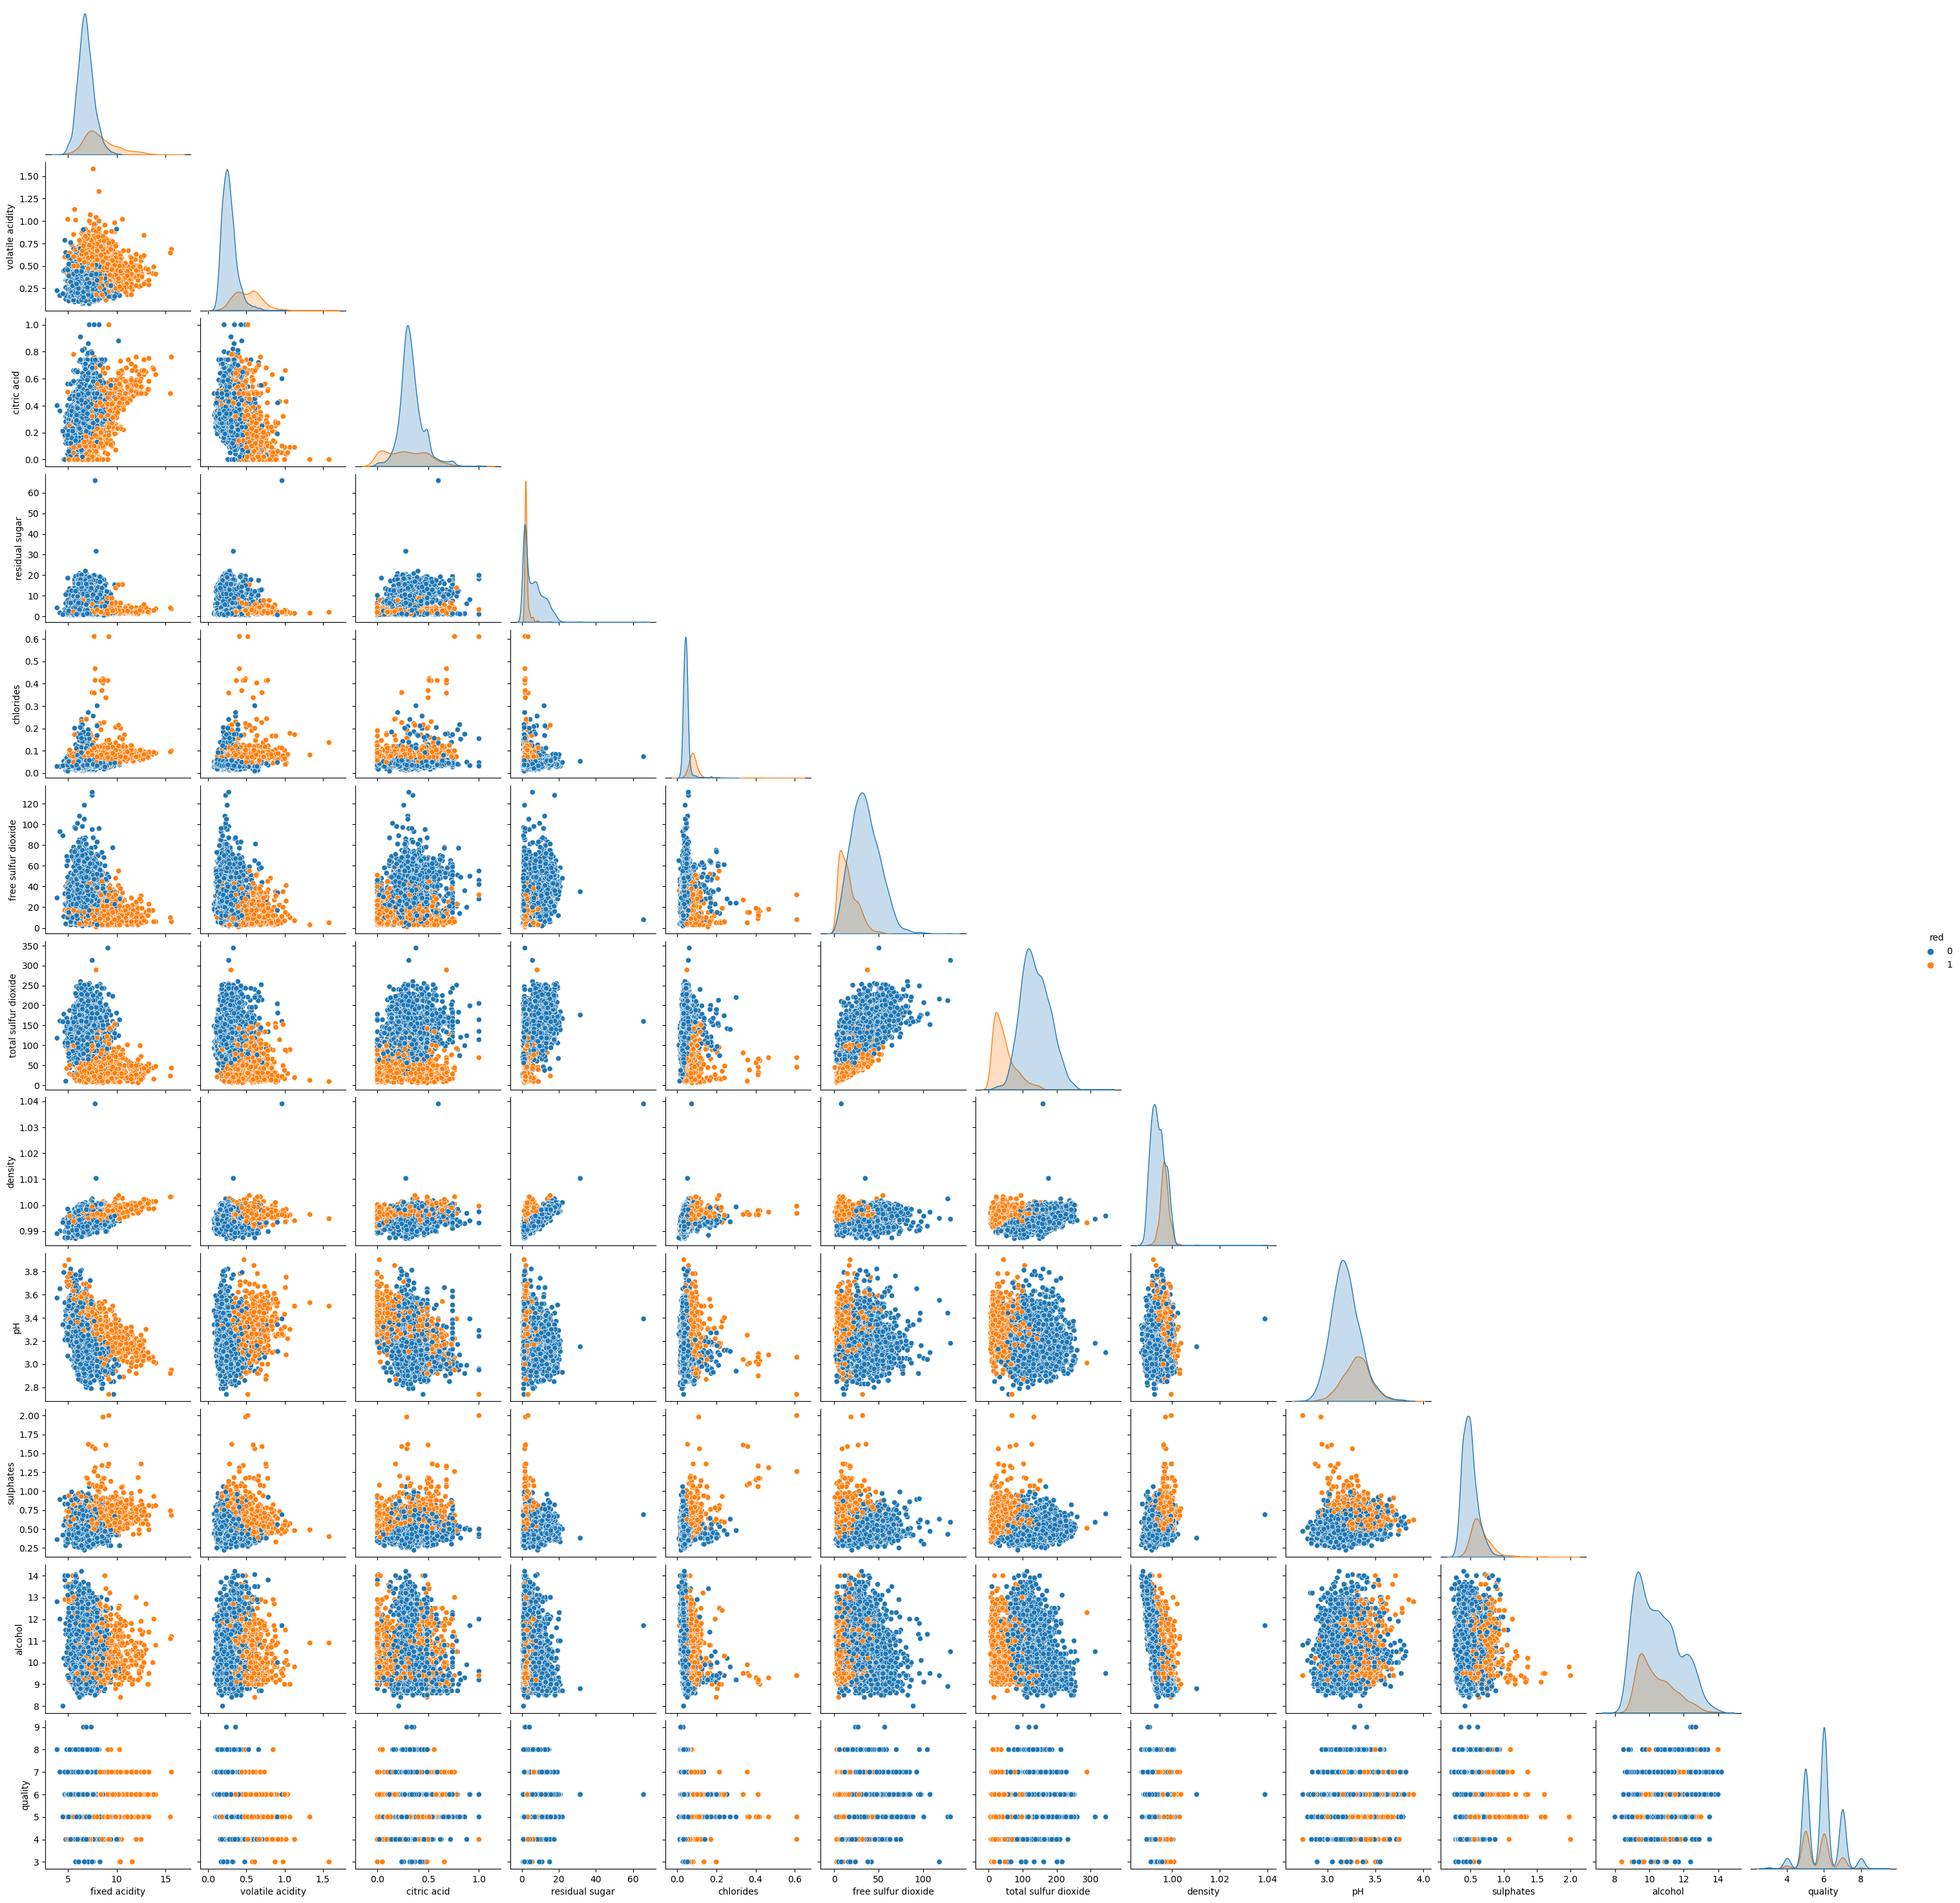

In [11]:
plt.figure(figsize=(10, 8))
sns.pairplot(data = train, hue = 'red', corner = True)
plt.show()

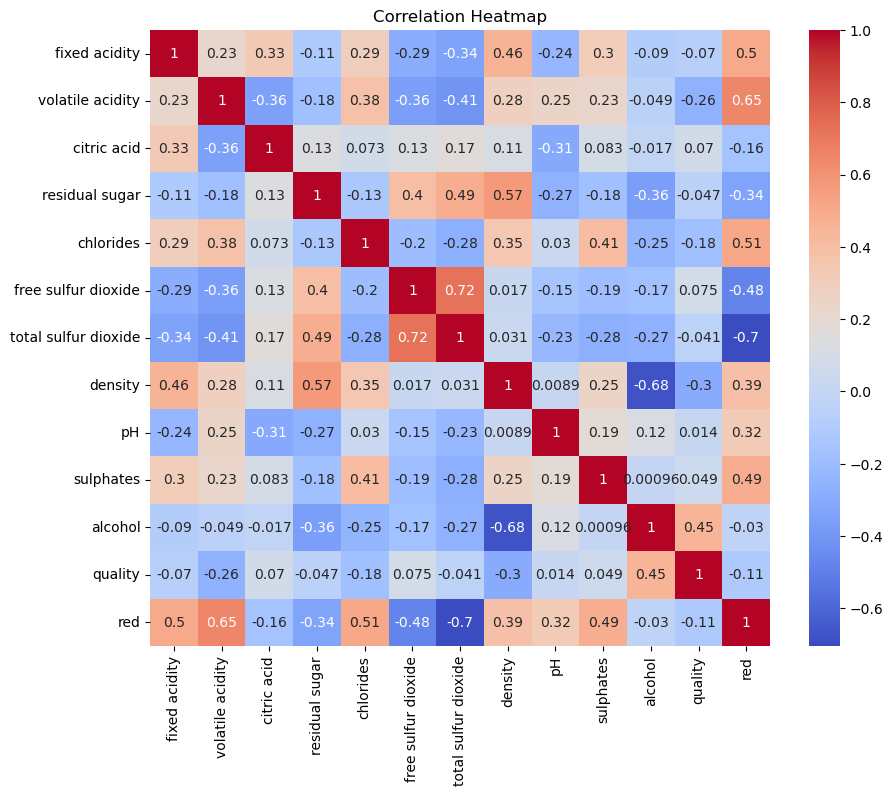

In [12]:
corr_matrix = train.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

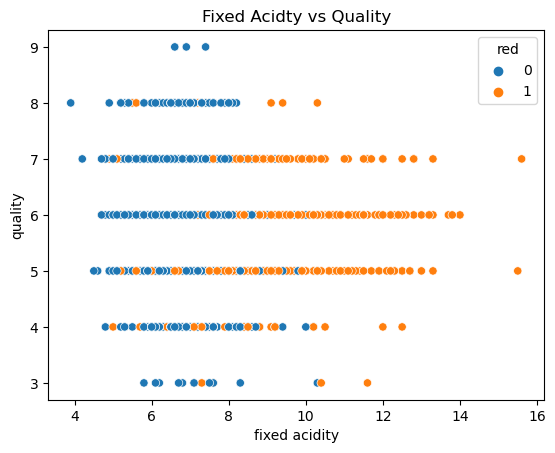

In [13]:
sns.scatterplot(data=train, x='fixed acidity', y='quality', hue='red')

# Set the labels and title
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('Fixed Acidty vs Quality')

# Display the plot
plt.show()

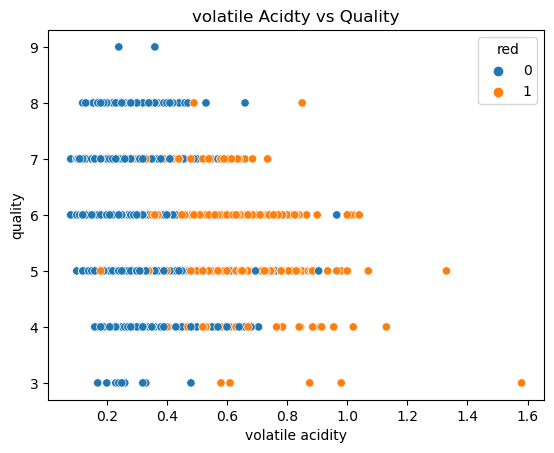

In [14]:
sns.scatterplot(data=train, x='volatile acidity', y='quality', hue='red')

# Set the labels and title
plt.xlabel('volatile acidity')
plt.ylabel('quality')
plt.title('volatile Acidty vs Quality')

# Display the plot
plt.show()

what percentage of reds have a quality rating above 5
what percentage of whites have a quality above 5

find the distribution/percentage of red wines and quality
find the distribution/percentage of white quality

quality, red, alcohol
quality, red, density
quality, red, volatile acidity

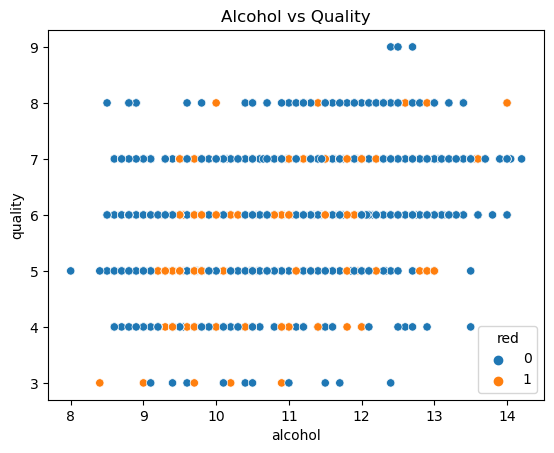

In [15]:
sns.scatterplot(data=train, x='alcohol', y='quality', hue='red')

# Set the labels and title
plt.xlabel('alcohol')
plt.ylabel('quality')
plt.title('Alcohol vs Quality')

# Display the plot
plt.show()

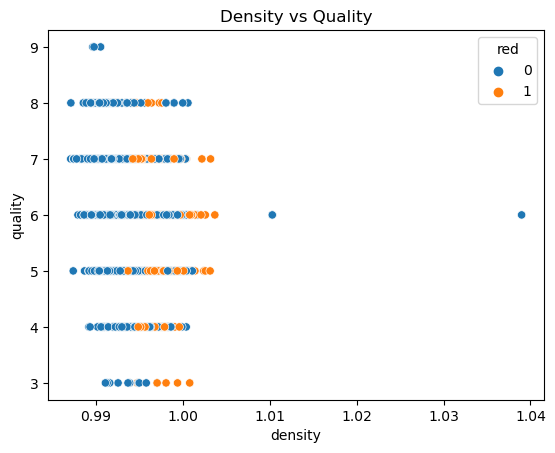

In [16]:
sns.scatterplot(data=train, x='density', y='quality', hue='red')

# Set the labels and title
plt.xlabel('density')
plt.ylabel('quality')
plt.title('Density vs Quality')

# Display the plot
plt.show()

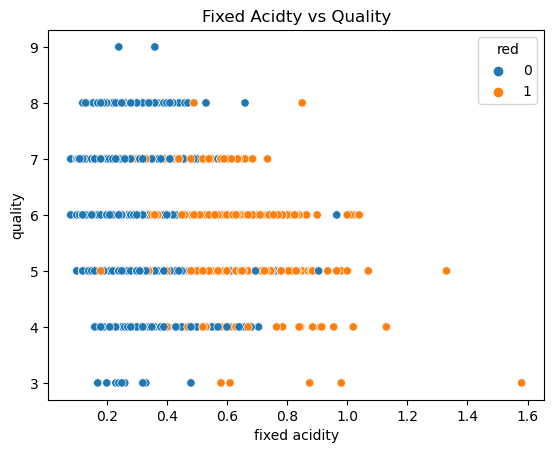

In [17]:
sns.scatterplot(data=train, x='volatile acidity', y='quality', hue='red')

# Set the labels and title
plt.xlabel('fixed acidity')
plt.ylabel('quality')
plt.title('Fixed Acidty vs Quality')

# Display the plot
plt.show()

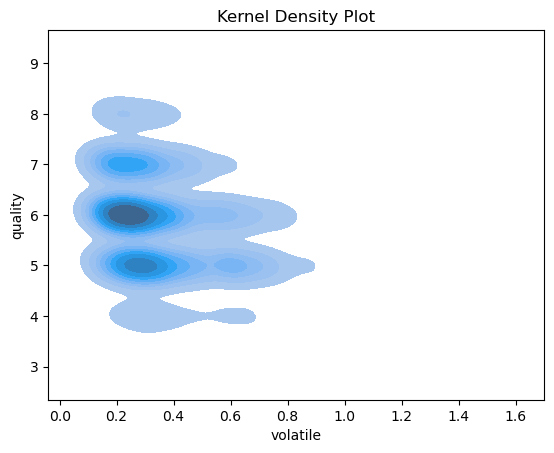

In [18]:
# Create a kernel density plot
sns.kdeplot(data = train, x='volatile acidity', y='quality', shade=True)

# Set the labels and title
plt.xlabel('volatile')
plt.ylabel('quality')
plt.title('Kernel Density Plot')

# Display the plot
plt.show()


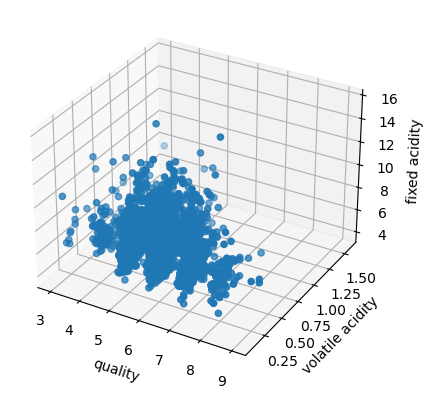

In [19]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(train['quality'], train['volatile acidity'], train['fixed acidity'])

# Set the labels
ax.set_xlabel('quality')
ax.set_ylabel('volatile acidity')
ax.set_zlabel('fixed acidity')

# Display the plot
plt.show()

### Exploration of red

In [20]:
df = a.get_wine()

In [21]:
df_red = df[df['red'] == 1]
df.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  red  
0      9.4        5    1  
1      9.8        5    1  
2      9.8        5    1  
3      9.8        6    1  
4      9.4        5    1

In [22]:
df_red['red'].value_counts(0)

1    1599
Name: red, dtype: int64

In [23]:
df_red = df_red.drop('red', axis = 1)


In [24]:
df_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5  
3      9.8        6  
4      9.4        5

#### Meet your data

In [25]:
df_red.describe().T

count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                           50%        75%        max  
fixed acidity          7.90000   9.200000   15.90000  
volatile acidity       0.52000   0.640000    1.58000  
citric acid            0.26000   0.420000    1.00000  
residual sugar         2.20000   2.600000   15.50000  
chlorides              0.07900   0.090000    0.61100  
free sulfur dioxide   14.00000  21.000000   72.00000  
total sulfur dioxide  38.00000  62.000000  289.00000  
density                0.99675   0.997835    1.00369  
pH                     3.31000   3.400000    4.01000  
sulphates              0.62000   0.730000    2.00000  
alcohol               10.20000  11.100000   14.90000  
quality                6.00000   6.000000    8.00000

In [26]:
df_red.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 162.4 KB


In [27]:
train, validate, test = p.split_data(df_red)

In [28]:
train.shape

(959, 12)

In [29]:
train_red = train

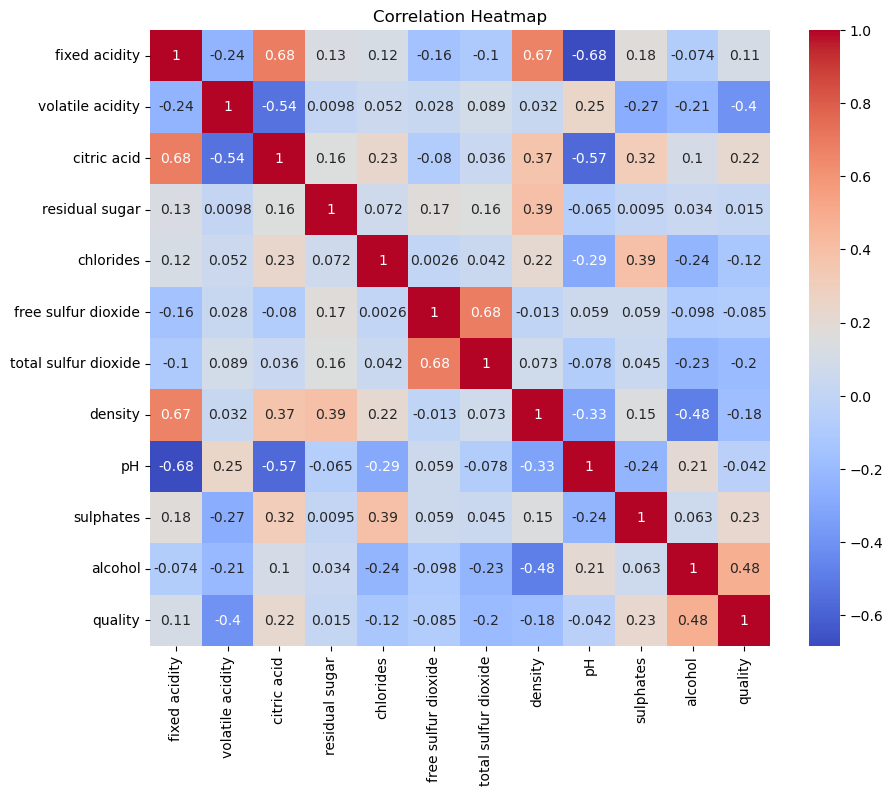

In [30]:
corr_matrix = train_red.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

#Relative strength of different features
negative correlation to volatile acidity, strong
positive correlation with alcohol, strong


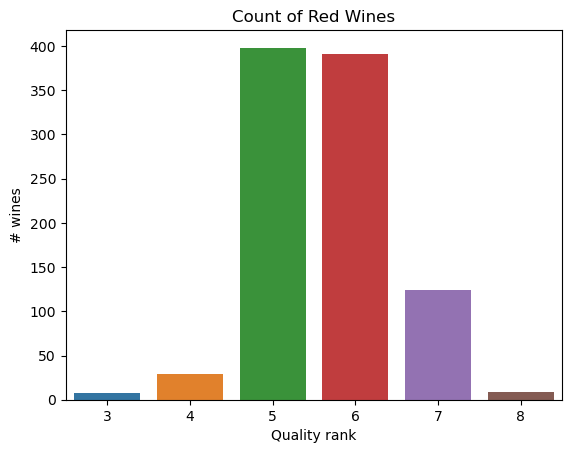

In [31]:
sns.countplot(data=train_red, x=train_red.quality)
plt.xlabel('Quality rank')
plt.ylabel('# wines')
plt.title('Count of Red Wines')
plt.show()

<Figure size 1200x1200 with 0 Axes>

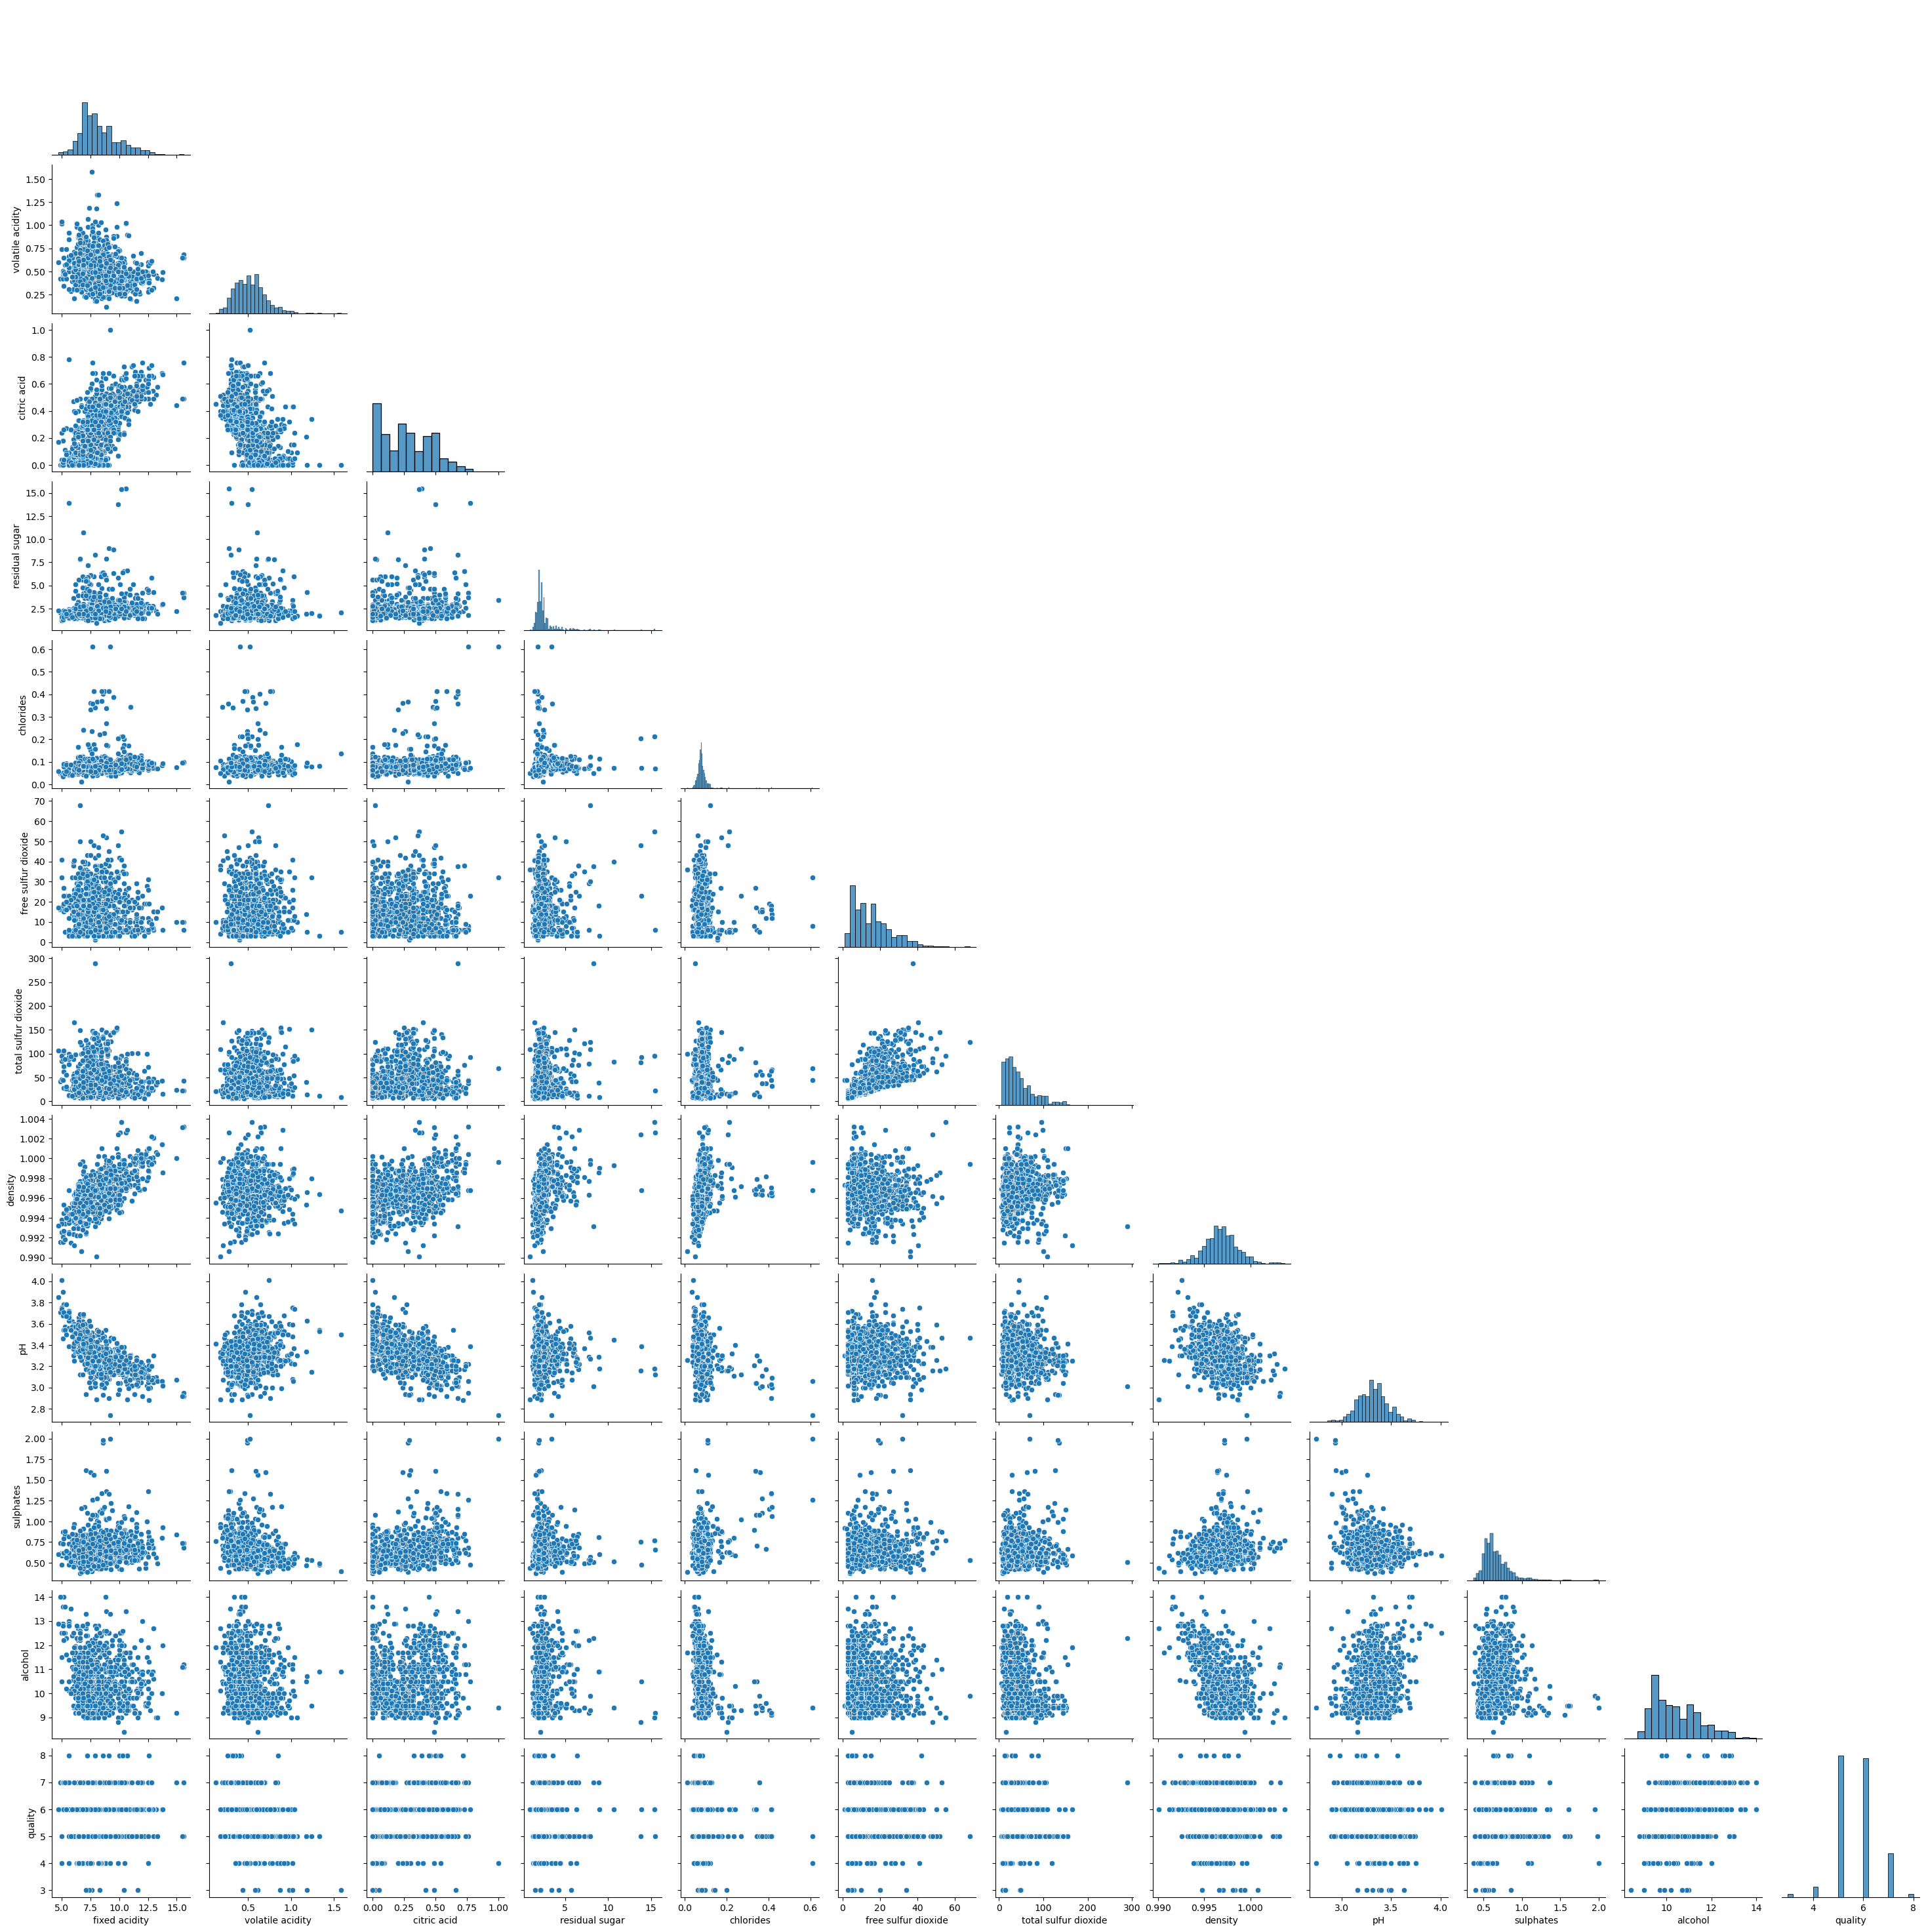

In [32]:
plt.figure(figsize=(12, 12))
sns.pairplot(data = train_red, corner = True)
plt.show()

In [33]:
def alcohol_plot_lmplot(train):
    """
    Creates an lmplot of finished_sf vs. taxvalue for a sample of 5000 rows from the training set.
    """
    # Create a sample of 5000 rows from the training set.
    train_sample = train_red.sample(n=900, random_state=42)
    # Create lmplot.
    sns.lmplot(x='alcohol', y= 'quality', data=train_sample)
plt.show()

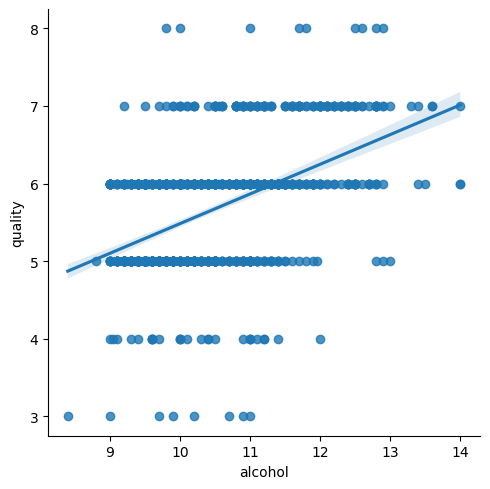

In [34]:
alcohol_plot_lmplot(train)

add cluster feature

bin the qualities bin 1 = 3-4, bin 2 = 5-6, bin 3 = 7-8

In [35]:
num_bins = 3

# Use the 'cut' function to assign each value to a bin
train_red['quality bin'] = pd.cut(train['quality'], num_bins, labels=[1, 2, 3])
#bin_mapping = {1: 1, 2: 2, 3: 3}
#data['bin'] = data['bin'].replace(bin_mapping)

# Display the updated DataFrame with the assigned bins
train_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1141            8.2              0.38         0.32             2.5      0.080   
995             7.7              0.60         0.06             2.0      0.079   
718             8.4              0.56         0.04             2.0      0.082   
1406            8.2              0.24         0.34             5.1      0.062   
1584            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1141                 24.0                  71.0  0.99624  3.27       0.85   
995                  19.0                  41.0  0.99697  3.39       0.62   
718                  10.0                  22.0  0.99760  3.22       0.44   
1406                  8.0                  22.0  0.99740  3.22       0.94   
1584                 24.0                  34.0  0.99484  3.29       0.80   

      alcohol  quality quality bin  
1141     11.0        6           2  
995      10.1        6           2  
718       9.6        5           2  
1406     10.9        6           2  
1584     11.6        7           3

In [36]:
bin_mapping = {(3.0, 4.667): 1, (4.667, 6.333): 2, (6.333, 8.0): 3}

# Replace the bin ranges with the desired replacement values
train_red['quality bin'].map(bin_mapping)

# Display the updated DataFrame with the replaced values
print(train_red)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1141            8.2             0.380         0.32             2.5      0.080   
995             7.7             0.600         0.06             2.0      0.079   
718             8.4             0.560         0.04             2.0      0.082   
1406            8.2             0.240         0.34             5.1      0.062   
1584            6.7             0.320         0.44             2.4      0.061   
...             ...               ...          ...             ...        ...   
1349            6.9             0.570         0.00             2.8      0.081   
1306            9.7             0.690         0.32             2.5      0.088   
206            12.8             0.300         0.74             2.6      0.095   
830             7.5             0.685         0.07             2.5      0.058   
742             6.5             0.615         0.00             1.9      0.065   

      free sulfur dioxide  

In [37]:
train_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1141            8.2              0.38         0.32             2.5      0.080   
995             7.7              0.60         0.06             2.0      0.079   
718             8.4              0.56         0.04             2.0      0.082   
1406            8.2              0.24         0.34             5.1      0.062   
1584            6.7              0.32         0.44             2.4      0.061   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1141                 24.0                  71.0  0.99624  3.27       0.85   
995                  19.0                  41.0  0.99697  3.39       0.62   
718                  10.0                  22.0  0.99760  3.22       0.44   
1406                  8.0                  22.0  0.99740  3.22       0.94   
1584                 24.0                  34.0  0.99484  3.29       0.80   

      alcohol  quality quality bin  
1141     11.0        6           2  
995      10.1        6           2  
718       9.6        5           2  
1406     10.9        6           2  
1584     11.6        7           3

In [38]:
train_1_red = train[train['quality bin'] == 1]
train_1_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
41              8.8             0.610         0.30             2.8      0.088   
1261            6.3             1.020         0.00             2.0      0.083   
573            10.5             0.590         0.49             2.1      0.070   
79              8.3             0.625         0.20             1.5      0.080   
1189            8.8             0.955         0.05             1.8      0.075   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
41                   17.0                  46.0  0.99760  3.26       0.51   
1261                 17.0                  24.0  0.99437  3.59       0.55   
573                  14.0                  47.0  0.99910  3.30       0.56   
79                   27.0                 119.0  0.99720  3.16       1.12   
1189                  5.0                  19.0  0.99616  3.30       0.44   

      alcohol  quality quality bin  
41        9.3        4           1  
1261     11.2        4           1  
573       9.6        4           1  
79        9.1        4           1  
1189      9.6        4           1

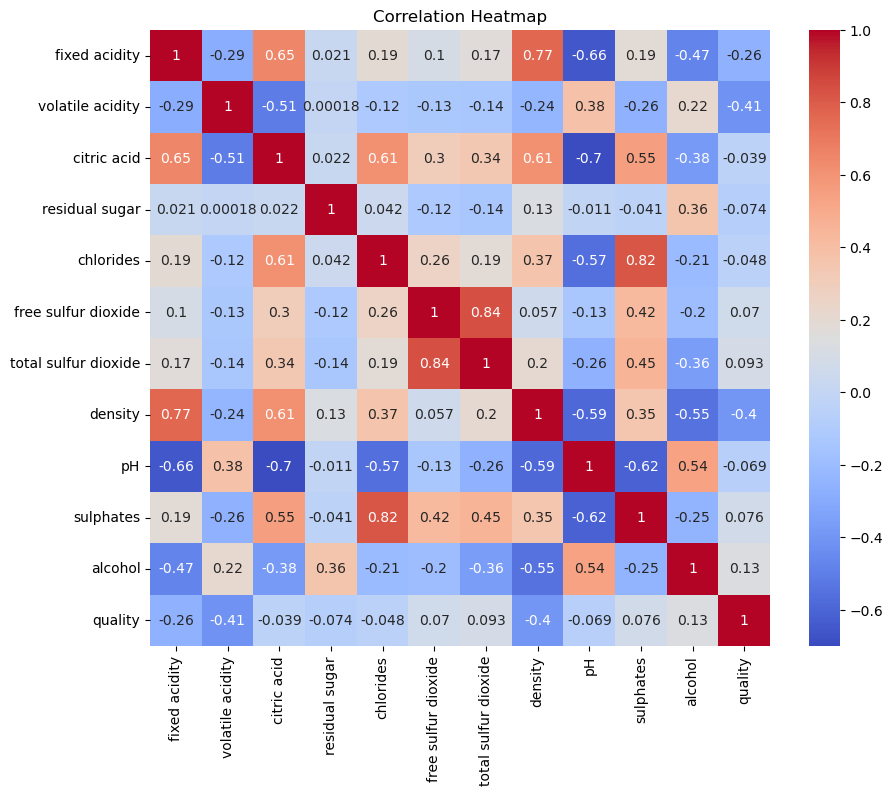

In [39]:
corr_matrix = train_1_red.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [40]:
train_2_red = train[train['quality bin'] == 2]
train_2_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1141            8.2              0.38         0.32             2.5      0.080   
995             7.7              0.60         0.06             2.0      0.079   
718             8.4              0.56         0.04             2.0      0.082   
1406            8.2              0.24         0.34             5.1      0.062   
1130            9.1              0.60         0.00             1.9      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1141                 24.0                  71.0  0.99624  3.27       0.85   
995                  19.0                  41.0  0.99697  3.39       0.62   
718                  10.0                  22.0  0.99760  3.22       0.44   
1406                  8.0                  22.0  0.99740  3.22       0.94   
1130                  5.0                  10.0  0.99770  3.18       0.63   

      alcohol  quality quality bin  
1141     11.0        6           2  
995      10.1        6           2  
718       9.6        5           2  
1406     10.9        6           2  
1130     10.4        6           2

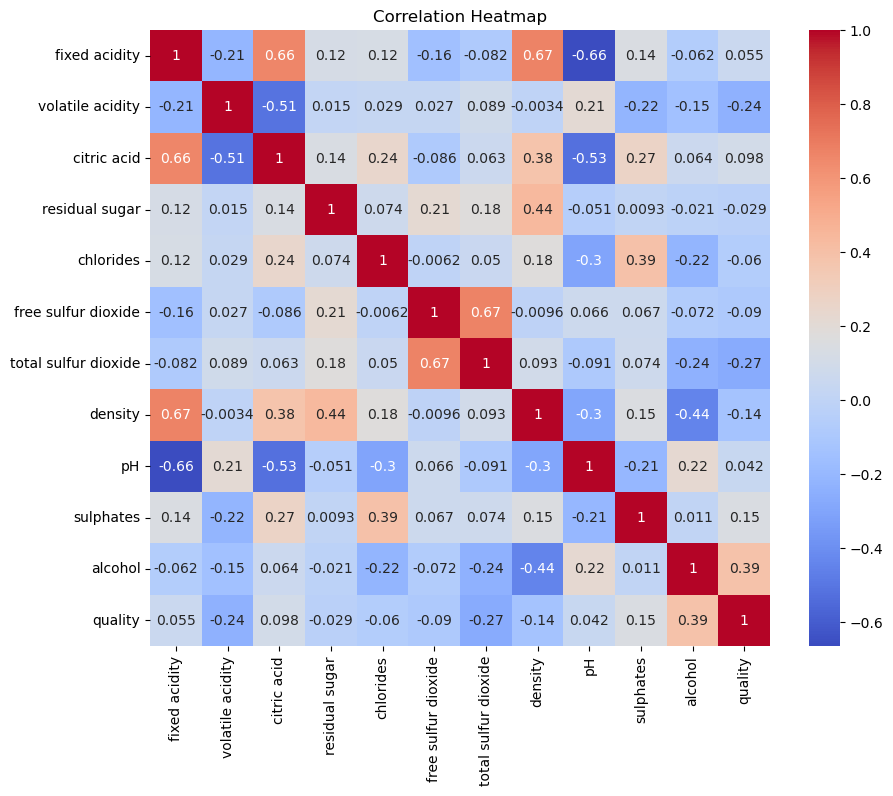

In [41]:
corr_matrix = train_2_red.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [43]:
train_3_red = train_red[train_red['quality bin'] == 3]
train_3_red.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1584            6.7              0.32         0.44             2.4      0.061   
837             6.7              0.28         0.28             2.4      0.012   
586            11.1              0.31         0.49             2.7      0.094   
978             7.0              0.40         0.32             3.6      0.061   
1157            5.1              0.51         0.18             2.1      0.042   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1584                 24.0                  34.0  0.99484  3.29       0.80   
837                  36.0                 100.0  0.99064  3.26       0.39   
586                  16.0                  47.0  0.99860  3.12       1.02   
978                   9.0                  29.0  0.99416  3.28       0.49   
1157                 16.0                 101.0  0.99240  3.46       0.87   

      alcohol  quality quality bin  
1584     11.6        7           3  
837      11.7        7           3  
586      10.6        7           3  
978      11.3        7           3  
1157     12.9        7           3

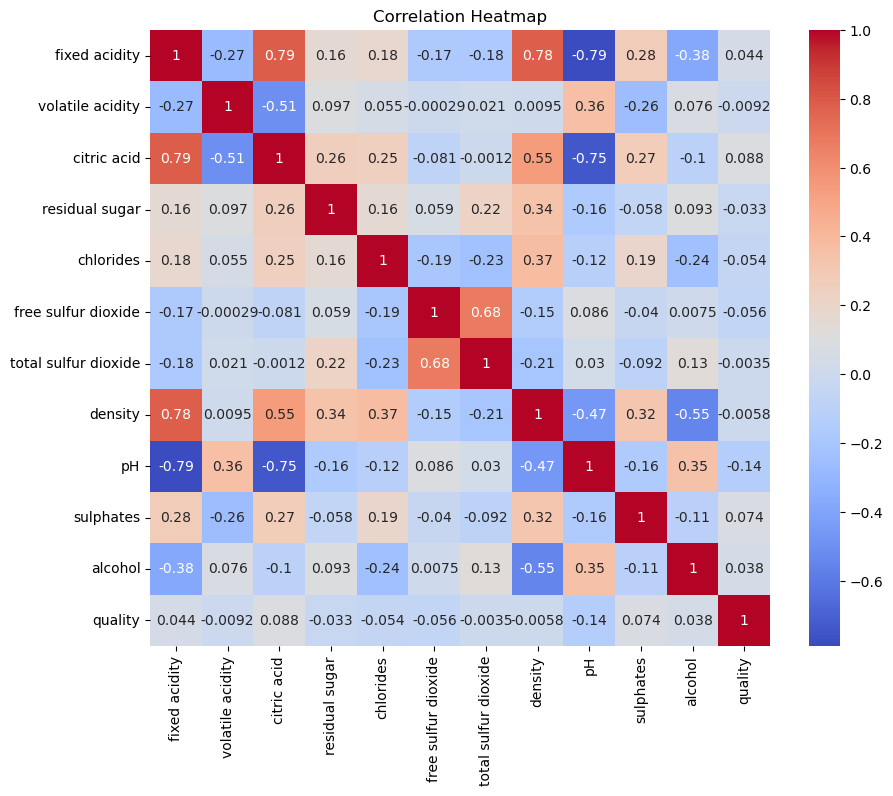

In [44]:
corr_matrix = train_3_red.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [45]:
df_white = a.get_wine()

In [46]:
df_white = df[df['red'] == 0]
df_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1599            7.0              0.27         0.36            20.7      0.045   
1600            6.3              0.30         0.34             1.6      0.049   
1601            8.1              0.28         0.40             6.9      0.050   
1602            7.2              0.23         0.32             8.5      0.058   
1603            7.2              0.23         0.32             8.5      0.058   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
1599                 45.0                 170.0   1.0010  3.00       0.45   
1600                 14.0                 132.0   0.9940  3.30       0.49   
1601                 30.0                  97.0   0.9951  3.26       0.44   
1602                 47.0                 186.0   0.9956  3.19       0.40   
1603                 47.0                 186.0   0.9956  3.19       0.40   

      alcohol  quality  red  
1599      8.8        6    0  
1600      9.5        6    0  
1601     10.1        6    0  
1602      9.9        6    0  
1603      9.9        6    0

In [47]:
df_white = df_white.drop('red', axis = 1)


In [48]:
train, validate, test = p.split_data(df_white)

In [50]:
train_white = train

In [51]:
num_bins = 3

# Use the 'cut' function to assign each value to a bin
train_white['quality bin'] = pd.cut(train_white['quality'], num_bins, labels=[1, 2, 3])
#bin_mapping = {1: 1, 2: 2, 3: 3}
#data['bin'] = data['bin'].replace(bin_mapping)

# Display the updated DataFrame with the assigned bins
train_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3073            6.9              0.25         0.24            3.60      0.057   
5366            6.9              0.40         0.17           12.90      0.033   
3453            6.8              0.24         0.35            6.40      0.048   
1772            6.3              0.22         0.43            4.55      0.038   
2911            9.6              0.25         0.54            1.30      0.040   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3073                 13.0                  85.0  0.99420  2.99       0.48   
5366                 59.0                 186.0  0.99754  3.08       0.49   
3453                 44.0                 172.0  0.99440  3.29       0.55   
1772                 31.0                 130.0  0.99180  3.35       0.33   
2911                 16.0                 160.0  0.99380  2.94       0.43   

      alcohol  quality quality bin  
3073      9.5        4           1  
5366      9.4        5           1  
3453     10.5        7           2  
1772     11.5        7           2  
2911     10.5        5           1

In [52]:
train_1_white = train[train['quality bin'] == 1]
train_1_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3073            6.9              0.25         0.24             3.6      0.057   
5366            6.9              0.40         0.17            12.9      0.033   
2911            9.6              0.25         0.54             1.3      0.040   
5040            7.1              0.25         0.28             1.2      0.040   
5006            6.1              0.33         0.32             7.8      0.052   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3073                 13.0                  85.0  0.99420  2.99       0.48   
5366                 59.0                 186.0  0.99754  3.08       0.49   
2911                 16.0                 160.0  0.99380  2.94       0.43   
5040                 31.0                 111.0  0.99174  3.18       0.53   
5006                 52.0                 183.0  0.99657  3.39       0.65   

      alcohol  quality quality bin  
3073      9.5        4           1  
5366      9.4        5           1  
2911     10.5        5           1  
5040     11.1        5           1  
5006      9.5        5           1

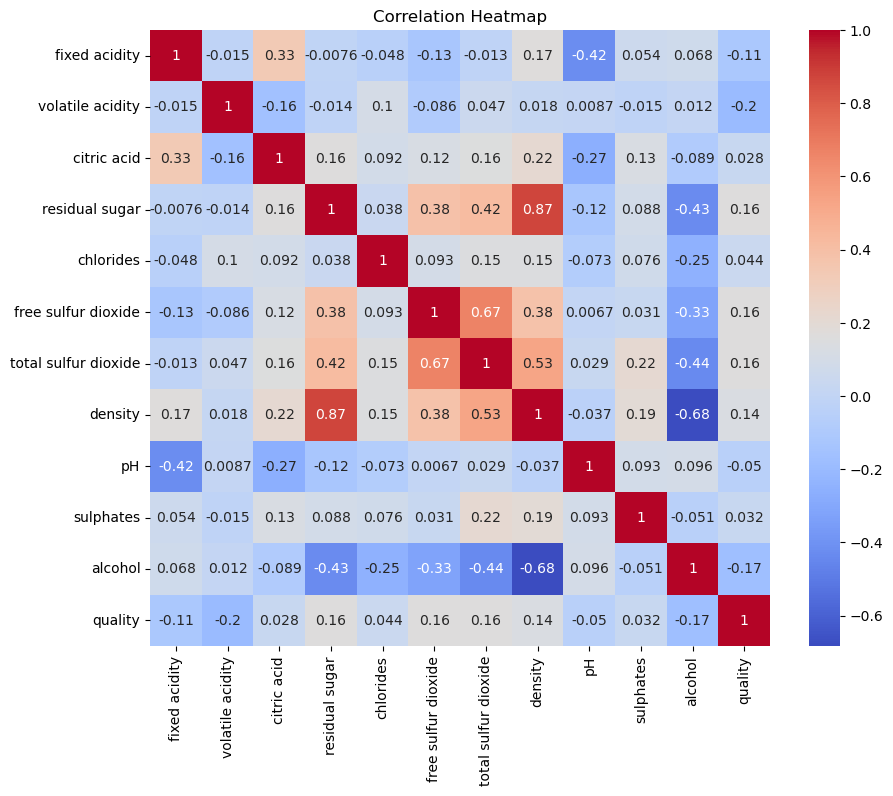

In [53]:
corr_matrix = train_1_white.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [55]:
train_2_white = train[train['quality bin'] == 2]
train_2_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
3453            6.8              0.24         0.35            6.40      0.048   
1772            6.3              0.22         0.43            4.55      0.038   
4759            6.5              0.34         0.46            1.00      0.023   
4779            6.5              0.24         0.38            1.00      0.027   
1753            8.2              0.23         0.40            7.50      0.049   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
3453                 44.0                 172.0  0.99440  3.29       0.55   
1772                 31.0                 130.0  0.99180  3.35       0.33   
4759                  6.0                  80.0  0.98865  3.15       0.54   
4779                 31.0                  90.0  0.98926  3.24       0.36   
1753                 12.0                  76.0  0.99660  3.06       0.84   

      alcohol  quality quality bin  
3453     10.5        7           2  
1772     11.5        7           2  
4759     12.9        6           2  
4779     12.3        6           2  
1753      9.7        6           2

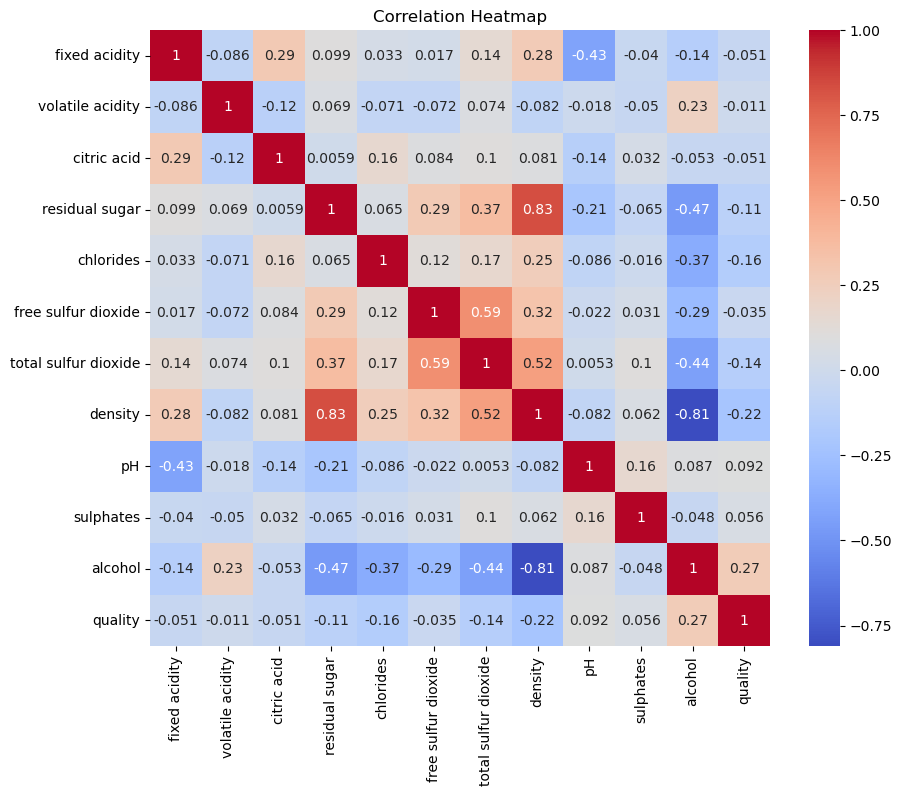

In [56]:
corr_matrix = train_2_white.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

In [57]:
train_3_white = train[train['quality bin'] == 3]
train_3_white.head()

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
5263            5.0              0.29         0.54            5.70      0.035   
5353            5.4              0.46         0.15            2.10      0.026   
3897            6.3              0.41         0.18            3.50      0.027   
1910            5.0              0.55         0.14            8.30      0.032   
5069            6.7              0.24         0.30            3.85      0.042   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
5263                 54.0                 155.0  0.98976  3.27       0.34   
5353                 29.0                 130.0  0.98953  3.39       0.77   
3897                 23.0                 109.0  0.99018  3.34       0.54   
1910                 35.0                 164.0  0.99180  3.53       0.51   
5069                105.0                 179.0  0.99189  3.04       0.59   

      alcohol  quality quality bin  
5263     12.9        8           3  
5353     13.4        8           3  
3897     12.8        8           3  
1910     12.5        8           3  
5069     11.3        8           3

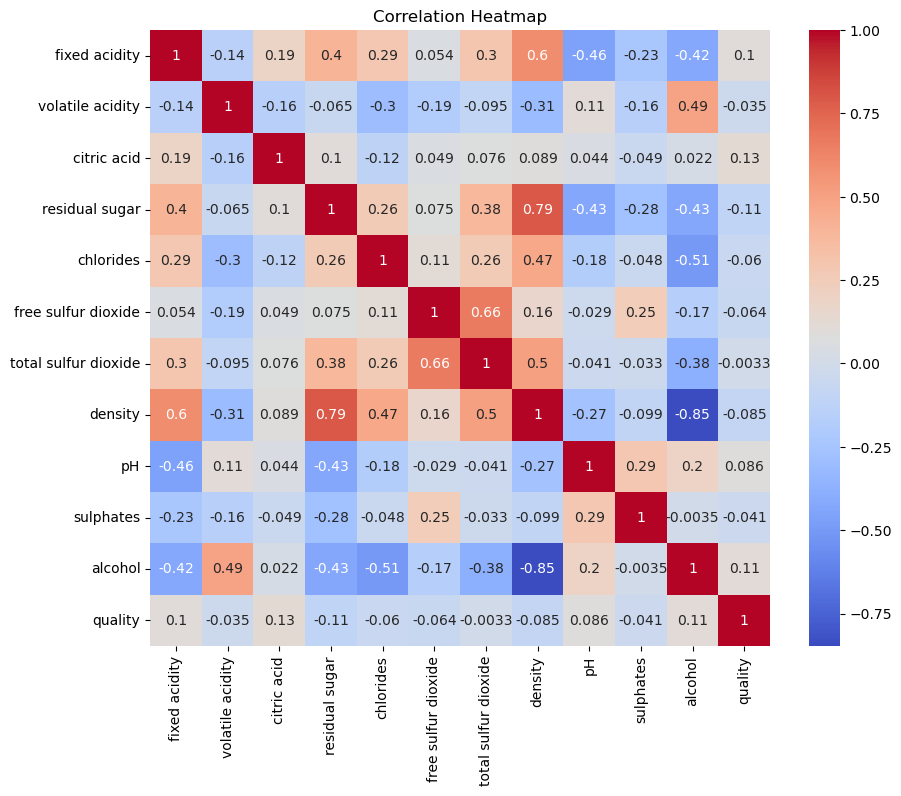

In [58]:
corr_matrix = train_3_white.corr()
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Set the title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

NameError: name 'col' is not defined

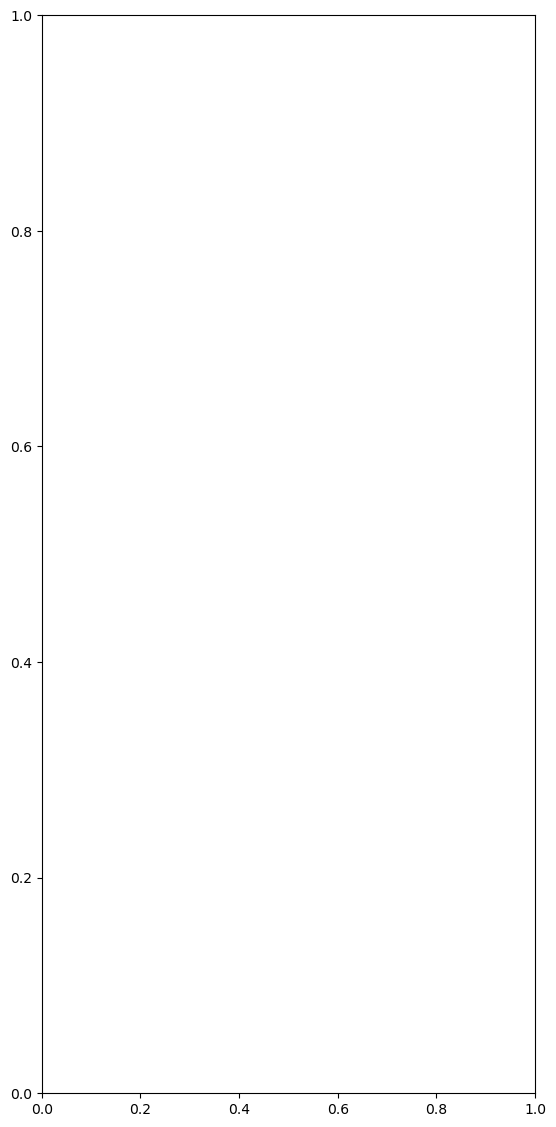

In [59]:
plt.figure(figsize=(14,14))
plt.subplot(2,3,1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm'))
plt.subplot(2,3,2)
sns.heatmap(df[col])
plt.subplot(2,3,3)
sns.heatmap(df[col])
plt.subplot(2,3,4)
sns.heatmap(df[col])
plt.subplot(2,3,5)
sns.heatmap(df[col])
plt.subplot(2,3,6)
sns.heatmap(df[col])
plt.show()